# Import and clean CVM data & Generate variables

In [1]:
# Import main packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import os
import plotly.io as pio

In [2]:
# List csv files in a path
path = 'C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\data_raw\\data\\cvm'
extension = 'csv'
os.chdir(path)
infiles = glob.glob('*.{}'.format(extension))
print(infiles)

['cgvn_cia_aberta_praticas_2018.csv', 'cgvn_cia_aberta_praticas_2019.csv', 'cgvn_cia_aberta_praticas_2020.csv', 'cgvn_cia_aberta_praticas_2021.csv', 'cgvn_cia_aberta_praticas_2022.csv', 'cgvn_cia_aberta_praticas_2023.csv']


In [3]:
# Loop and create a df with all files
df = pd.DataFrame()
for infile in infiles:
    data = pd.read_fwf(infile, header=None, encoding = 'latin-1')
    data = data[0].str.split(';', expand=True)
    data.columns = data.iloc[0]
    data = data[1:]
    df = df.append(data,ignore_index=True)

C:\Users\livia\AppData\Local\Temp\ipykernel_5492\42011444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data,ignore_index=True)
C:\Users\livia\AppData\Local\Temp\ipykernel_5492\42011444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data,ignore_index=True)
C:\Users\livia\AppData\Local\Temp\ipykernel_5492\42011444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data,ignore_index=True)
C:\Users\livia\AppData\Local\Temp\ipykernel_5492\42011444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data,ignore_index=True)
C:\Users\livia\AppData\Local\Temp\ipykernel_5492

In [4]:
# Create new dataframe with selected columns and change names, adjust dates

df_main = df.loc[:, ['CNPJ_Companhia', 'Nome_Empresarial', 'Data_Referencia', 'Capitulo', 'Pratica_Adotada']]

df_main.columns = ['code_cnpj', 'name', 'date', 'cap', 'practices']

df_main['date'] = pd.to_datetime(df_main['date'])

In [5]:
# Create an index based on points scored versus all possible - All possible

def set_all(row):
    if row["practices"] == "Não se Aplica":
        return 0.0
    else:
        return 1.0

df_main = df_main.assign(p_all =df_main.apply(set_all, axis=1))

print(df_main)

                 code_cnpj             name       date  \
0       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
1       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
2       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
3       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
4       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
...                    ...              ...        ...   
101785  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101786  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101787  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101788  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101789  97.837.181/0001-47       DEXCO S.A. 2023-12-31   

                                   cap      practices  p_all  
0                           Acionistas            Sim    1.0  
1                           Acionistas            Sim    1.0  
2                           Acionistas            Sim    1.0  
3                           Acionistas            S

In [6]:
# Create an index based on points scored versus all possible - Scored

def set_point(row):
    if row["practices"] == "Sim":
        return 1.0
    elif row["practices"] == "Parcialmente":
        return 0.5
    else:
        return 0

df_main = df_main.assign(p_set = df_main.apply(set_point, axis=1))

print(df_main)

                 code_cnpj             name       date  \
0       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
1       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
2       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
3       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
4       00.000.000/0001-91  BCO BRASIL S.A. 2018-12-31   
...                    ...              ...        ...   
101785  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101786  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101787  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101788  97.837.181/0001-47       DEXCO S.A. 2023-12-31   
101789  97.837.181/0001-47       DEXCO S.A. 2023-12-31   

                                   cap      practices  p_all  p_set  
0                           Acionistas            Sim    1.0    1.0  
1                           Acionistas            Sim    1.0    1.0  
2                           Acionistas            Sim    1.0    1.0  
3                      

In [7]:
# Aggregate index points

df_final = df_main.groupby(['code_cnpj','name', 'date', 'cap']).agg({'p_all': 'sum', 'p_set': 'sum'}).reset_index()

In [8]:
# Convert data to wide

import janitor

df= df_final.pivot_wider(
        index = ['code_cnpj','name', 'date'], 
        names_from = 'cap', 
        values_from = ['p_all','p_set'], 
        names_glue = "{cap}_{_value}")

C:\Users\livia\anaconda3\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


In [9]:
# Select variables and calculate index

df.columns = ['code_cnpj', 'name', 'date', 'p_all_ac', 'p_all_ca', 'p_all_dir', 'p_all_et', 'p_all_fc', 'p_set_ac', 'p_set_ca', 'p_set_dir', 'p_set_et', 'p_set_fc']

df['p_all_all'] = df['p_all_ac'] + df['p_all_ca'] + df['p_all_dir'] + df['p_all_et'] + df['p_all_fc']
df['p_set_all'] = df['p_set_ac'] + df['p_set_ca'] + df['p_set_dir'] + df['p_set_et'] + df['p_set_fc']

df['index_ac'] = df['p_set_ac'] / df['p_all_ac'].values 
df['index_ca'] = df['p_set_ca'] / df['p_all_ca'].values 
df['index_dir'] = df['p_set_dir'] / df['p_all_dir'].values 
df['index_et'] = df['p_set_et'] / df['p_all_et'].values 
df['index_fc'] = df['p_set_fc'] / df['p_all_fc'].values 
df['index_all'] = df['p_set_all'] / df['p_all_all'].values 

In [10]:
# Select variables and adjust CNPJ format

df_main = df.loc[:, ['code_cnpj', 'name', 'date', 'index_ac', 'index_ca', 'index_dir', 'index_et', 'index_fc', 'index_all']]

df_main['cnpj'] = df_main['code_cnpj'].str.replace(r"(\d)\.", r"\1")
df_main['cnpj'] = df_main['cnpj'].replace({'/': ''}, regex=True)
df_main['cnpj'] = df_main['cnpj'].replace({'-': ''}, regex=True)

# Show results
df_main.head()

C:\Users\livia\AppData\Local\Temp\ipykernel_5492\1890309110.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_main['cnpj'] = df_main['code_cnpj'].str.replace(r"(\d)\.", r"\1")


,code_cnpj,name,date,index_ac,index_ca,index_dir,index_et,index_fc,index_all,cnpj
0,00.000.000/0001-91,BCO BRASIL S.A.,2018-12-31,0.75,0.875,1.0000,0.75,1.0,0.861111,00000000000191
1,00.000.000/0001-91,BCO BRASIL S.A.,2019-12-31,0.75,0.875,1.0000,0.75,1.0,0.861111,00000000000191
2,00.000.000/0001-91,BCO BRASIL S.A.,2020-12-31,1.00,0.875,0.9375,0.75,1.0,0.901961,00000000000191
3,00.000.000/0001-91,BCO BRASIL S.A.,2021-12-31,1.00,0.875,0.9375,0.75,1.0,0.900000,00000000000191
4,00.000.000/0001-91,BCO BRASIL S.A.,2022-12-31,1.00,0.875,0.9375,0.75,1.0,0.900000,00000000000191


# Import and clean Economatica data & Generate variables

In [11]:
# Import data from Economatica

df = pd.read_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\data_raw\\data\\df_economatica.csv', dtype={'cnpj': str})

In [12]:
# Adjusta data

df = df.drop('Unnamed: 0', axis=1)

df['date'] = pd.to_datetime(df['date'])

df.head()

,nome,classe,bolsa,ativo,estado,codigo,cnpj,setor_bovespa,seg_bovespa,seg_listagem,...,liq_ratio,curr_ratio,quick_ratio,return,capex,neg,sharpe,var,beta,vol
0,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,12091809000155,Petróleo gás e biocombustíveis,Exploração refino e distribuição,Novo Mercado,...,0.869584,5.464062,5.464062,NaN,380569000.0,NaN,NaN,NaN,NaN,NaN
1,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,12091809000155,Petróleo gás e biocombustíveis,Exploração refino e distribuição,Novo Mercado,...,0.887621,3.144411,3.144411,NaN,380569000.0,NaN,NaN,NaN,NaN,NaN
2,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,12091809000155,Petróleo gás e biocombustíveis,Exploração refino e distribuição,Novo Mercado,...,0.818629,2.714498,2.714498,NaN,380569000.0,NaN,NaN,NaN,NaN,NaN
3,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,12091809000155,Petróleo gás e biocombustíveis,Exploração refino e distribuição,Novo Mercado,...,0.774324,6.740112,6.698623,NaN,380569000.0,0.004509,NaN,NaN,NaN,NaN
4,3r Petroleum,ON,Bovespa,Ação,ativo,RRRP3,12091809000155,Petróleo gás e biocombustíveis,Exploração refino e distribuição,Novo Mercado,...,2.211190,4.786797,4.757474,-9.811828,380569000.0,0.243084,-0.039656,5.251716,5.251716,5.251716


# Merge and data preprocessing

In [13]:
# Merge CVM data with Economatica data on CNPJ and date

df_new = df_main.merge(df, how='left', on = ['cnpj', 'date'])

In [14]:
# Select variables of interest and drop nulls

df_final = df_new.loc[:, ['cnpj', 'nome', 'date', 'codigo', 'seg_listagem', 'setor_econo', 'index_all', 'index_ac', 'index_ca', 'index_dir', 'index_et', 'index_fc', 'total_assets', 'mktcap', 'gross_margin' , 'roa', 'pe', 'cap_str', 'fin_turn', 'oper_turn', 'capex', 'neg']]

df_final = df_final.dropna(subset = ['cnpj', 'nome', 'date', 'codigo', 'seg_listagem', 'setor_econo', 'index_all', 'index_ac', 'index_ca', 'index_dir', 'index_et', 'index_fc', 'total_assets', 'mktcap', 'gross_margin' , 'roa', 'pe', 'cap_str', 'fin_turn', 'oper_turn', 'capex', 'neg'])

In [15]:
# Get info on final data

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 13 to 2582
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cnpj          1461 non-null   object        
 1   nome          1461 non-null   object        
 2   date          1461 non-null   datetime64[ns]
 3   codigo        1461 non-null   object        
 4   seg_listagem  1461 non-null   object        
 5   setor_econo   1461 non-null   object        
 6   index_all     1461 non-null   float64       
 7   index_ac      1461 non-null   float64       
 8   index_ca      1461 non-null   float64       
 9   index_dir     1461 non-null   float64       
 10  index_et      1461 non-null   float64       
 11  index_fc      1461 non-null   float64       
 12  total_assets  1461 non-null   float64       
 13  mktcap        1461 non-null   float64       
 14  gross_margin  1461 non-null   float64       
 15  roa           1461 non-null   float64

In [16]:
# Sepate numeric data from categorical data

df_num = df_final.loc[:, ['index_all', 'index_ac', 'index_ca', 'index_dir', 'index_et', 'index_fc', 'total_assets', 'mktcap', 'gross_margin' , 'roa', 'pe', 'cap_str', 'fin_turn', 'oper_turn', 'capex', 'neg']]

df_cat = df_final.loc[:, ['cnpj', 'nome', 'date', 'codigo', 'seg_listagem', 'setor_econo']].reset_index()

df_cat = df_cat.drop('index', axis=1)

In [17]:
df_cat.head()

,cnpj,nome,date,codigo,seg_listagem,setor_econo
0,00001180000126,Eletrobras,2018-12-31,ELET3,Nível 1,Energia Elétrica
1,00001180000126,Eletrobras,2018-12-31,ELET6,Nível 1,Energia Elétrica
2,00001180000126,Eletrobras,2019-12-31,ELET3,Nível 1,Energia Elétrica
3,00001180000126,Eletrobras,2019-12-31,ELET5,Nível 1,Energia Elétrica
4,00001180000126,Eletrobras,2019-12-31,ELET6,Nível 1,Energia Elétrica


In [18]:
# Preprocess data - scale numerical data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)

df_scaled = pd.concat([df_cat, df_scaled], axis=1)

In [19]:
# Preprocess data - scale numerical data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

df_mmscaled = pd.DataFrame(mmscaler.fit_transform(df_num), columns = df_num.columns)

df_mmscaled = pd.concat([df_cat, df_mmscaled], axis=1)

In [20]:
# Preprocess data - normalize numerical data

from sklearn.preprocessing import normalize

df_norm = pd.DataFrame(normalize(df_num), columns = df_num.columns)

df_norm = pd.concat([df_cat, df_norm], axis=1)

In [21]:
# Save all dataframes

df_scaled.to_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\df_scaled.csv', encoding='utf-8')
df_mmscaled.to_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\df_mmscaled.csv', encoding='utf-8')
df_norm.to_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\df_norm.csv', encoding='utf-8')
df_final.to_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\df.csv', encoding='utf-8')

In [22]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 13 to 2582
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index_all     1461 non-null   float64
 1   index_ac      1461 non-null   float64
 2   index_ca      1461 non-null   float64
 3   index_dir     1461 non-null   float64
 4   index_et      1461 non-null   float64
 5   index_fc      1461 non-null   float64
 6   total_assets  1461 non-null   float64
 7   mktcap        1461 non-null   float64
 8   gross_margin  1461 non-null   float64
 9   roa           1461 non-null   float64
 10  pe            1461 non-null   float64
 11  cap_str       1461 non-null   float64
 12  fin_turn      1461 non-null   float64
 13  oper_turn     1461 non-null   float64
 14  capex         1461 non-null   float64
 15  neg           1461 non-null   float64
dtypes: float64(16)
memory usage: 194.0 KB


# Generate descriptive statistics

In [23]:
df_numds = df_num.rename(columns = {'index_all':'Ind. de gov.', 'index_ac':'Ind. de acion.', 
                                    'index_ca':'Ind. de cons.', 'index_dir':'Ind. de dir.', 
                                    'index_et':'Ind. de eti.','index_fc':'Ind. de fisc.',
                                    'total_assets':'Ativos', 'mktcap':'Cap. de merc.',
                                    'gross_margin':'Mg. bruta', 'roa':'ROA', 'pe':'P/L',
                                    'cap_str':'Est. de cap.', 'fin_turn':'Ciclo fin.',
                                    'oper_turn':'Ciclo oper.', 'capex':'CAPEX', 'neg':'Ind. de neg.'})

In [24]:
# Generate descriptive statistics table and save results

df_stats = df_numds.describe()

df_stats.head()

df_stats.to_csv('C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\df_stats.csv', encoding='utf-8')

C:\Users\livia\anaconda3\lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


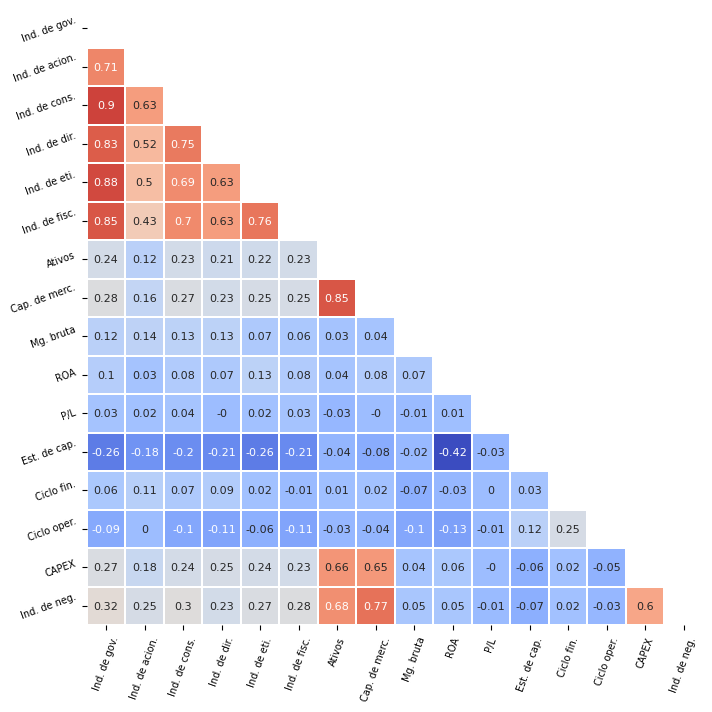

In [25]:
# Creating the correlation matrix

plt.figure(figsize=(15,8))

corr_matrix = df_numds.corr().round(2)

mask = np.zeros_like(corr_matrix)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr_matrix,
    vmin=corr_matrix.values.min(),
    vmax=1,
    square=True,
    cmap="coolwarm",
    linewidths=0.1,
    annot=True,
    annot_kws={"fontsize":8},
    mask = mask, cbar=False
)

plt.yticks(fontsize= 7, rotation= 20) 
plt.xticks(fontsize= 7, rotation= 70) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\corr_plot.pdf", format="pdf")

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

# Generate graphs

In [26]:
df_graphs = df_final.rename(columns = {'seg_listagem':'Seg. Bovespa', 'setor_econo':'Setor',
                                       'index_all':'Ind. de gov.', 'index_ac':'Ind. de acion.', 
                                       'index_ca':'Ind. de cons.', 'index_dir':'Ind. de dir.', 
                                       'index_et':'Ind. de eti.','index_fc':'Ind. de fisc.',
                                       'total_assets':'Ativos', 'mktcap':'Cap. de merc.',
                                       'gross_margin':'Mg. bruta', 'roa':'ROA', 'pe':'P/L',
                                       'cap_str':'Est. de cap.', 'fin_turn':'Ciclo fin.',
                                       'oper_turn':'Ciclo oper.', 'capex':'CAPEX', 'neg':'Ind. de neg.'})

df_graphs.head()

,cnpj,nome,date,codigo,Seg. Bovespa,Setor,Ind. de gov.,Ind. de acion.,Ind. de cons.,Ind. de dir.,...,Ativos,Cap. de merc.,Mg. bruta,ROA,P/L,Est. de cap.,Ciclo fin.,Ciclo oper.,CAPEX,Ind. de neg.
13,00001180000126,Eletrobras,2018-12-31,ELET3,Nível 1,Energia Elétrica,0.80,0.5,0.833333,0.8125,...,1.729754e+11,2.705181e+10,59.410634,-0.997651,-14.831539,75.284033,-178.129295,66.429001,1.401763e+09,0.653551
15,00001180000126,Eletrobras,2018-12-31,ELET6,Nível 1,Energia Elétrica,0.80,0.5,0.833333,0.8125,...,1.729754e+11,2.705181e+10,59.410634,-0.997651,-17.408270,75.284033,-178.129295,66.429001,1.401763e+09,0.493269
16,00001180000126,Eletrobras,2019-12-31,ELET3,Nível 1,Energia Elétrica,0.79,0.5,0.833333,0.7500,...,1.812102e+11,3.382095e+10,77.830241,7.365798,2.471225,69.091726,-101.768022,116.722900,1.401763e+09,0.766348
17,00001180000126,Eletrobras,2019-12-31,ELET5,Nível 1,Energia Elétrica,0.79,0.5,0.833333,0.7500,...,1.812102e+11,3.382095e+10,77.830241,7.365798,3.029112,69.091726,-101.768022,116.722900,1.401763e+09,0.000012
18,00001180000126,Eletrobras,2019-12-31,ELET6,Nível 1,Energia Elétrica,0.79,0.5,0.833333,0.7500,...,1.812102e+11,3.382095e+10,77.830241,7.365798,2.873067,69.091726,-101.768022,116.722900,1.401763e+09,0.561780


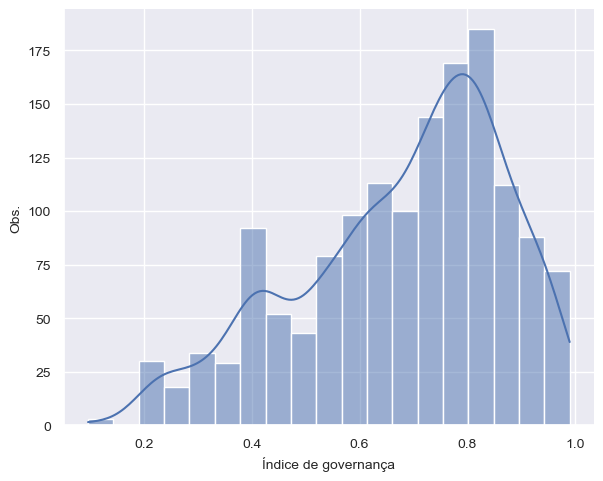

In [27]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de gov.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de governança", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_1.pdf", format="pdf")
plt.show()

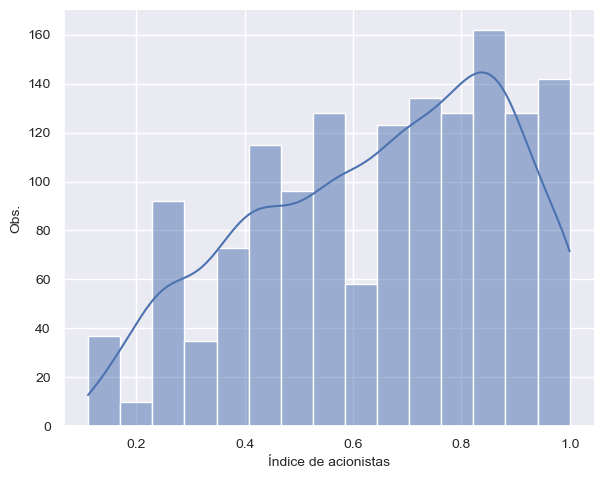

In [28]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de acion.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de acionistas", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_2.pdf", format="pdf")
plt.show()

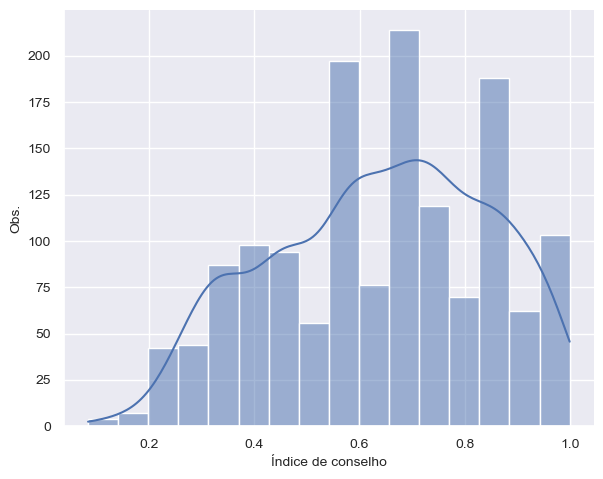

In [29]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de cons.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de conselho", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_3.pdf", format="pdf")
plt.show()

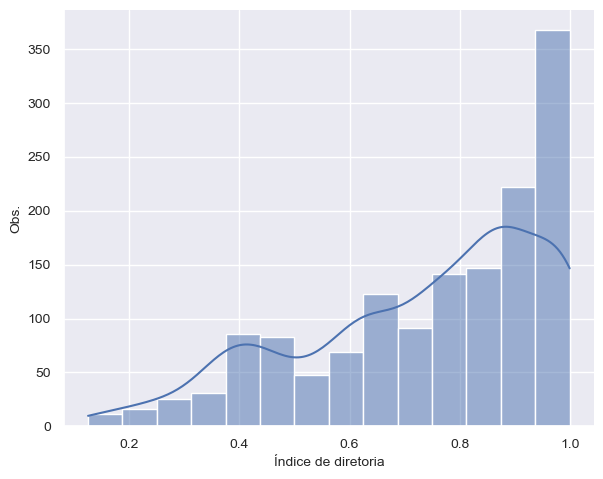

In [30]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de dir.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de diretoria", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_4.pdf", format="pdf")
plt.show()

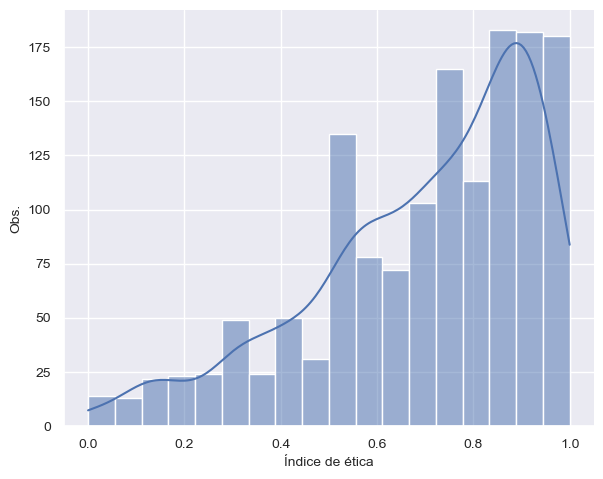

In [31]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de eti.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de ética", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_5.pdf", format="pdf")
plt.show()

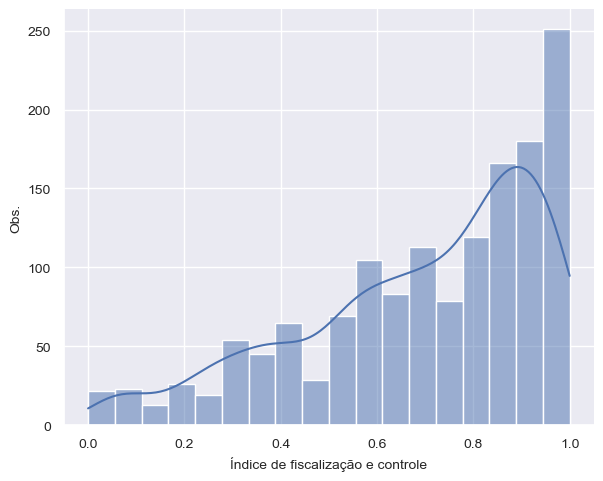

In [32]:
# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.displot(df_graphs, x="Ind. de fisc.", kde = True, height= 5, aspect=1.25)

plt.xlabel("Índice de fiscalização e controle", fontsize=10)
plt.ylabel("Obs.", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_1_6.pdf", format="pdf")
plt.show()

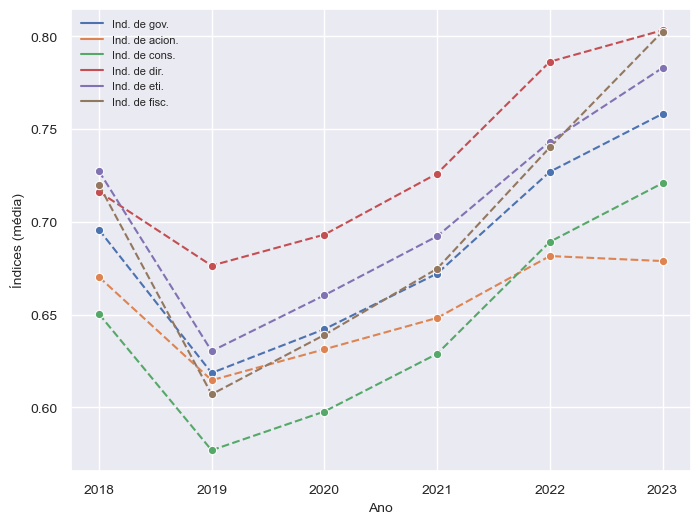

In [33]:
# Plot indexes evolution by year

# convert to long form

dfg = df_graphs.groupby(['date'])[['Ind. de gov.', 'Ind. de acion.', 'Ind. de cons.', 'Ind. de dir.', 'Ind. de eti.', 'Ind. de fisc.']].mean().reset_index()
dfg = dfg.melt('date', var_name='Índices', value_name='vals')
dfg['Year'] = dfg['date'].dt.year 

# Creating distribution plot

sns.set_theme(style="darkgrid")

sns.set(rc={'figure.figsize':(8,6)}, font_scale=1.5, style='darkgrid')

sns.lineplot(x="Year", y="vals", hue='Índices', data = dfg, linestyle='--', marker = 'o')


plt.xlabel("Ano", fontsize=10)
plt.ylabel("Índices (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

plt.legend(loc='upper left', fontsize= 8, frameon=False)

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_2.pdf", format="pdf")
plt.show()

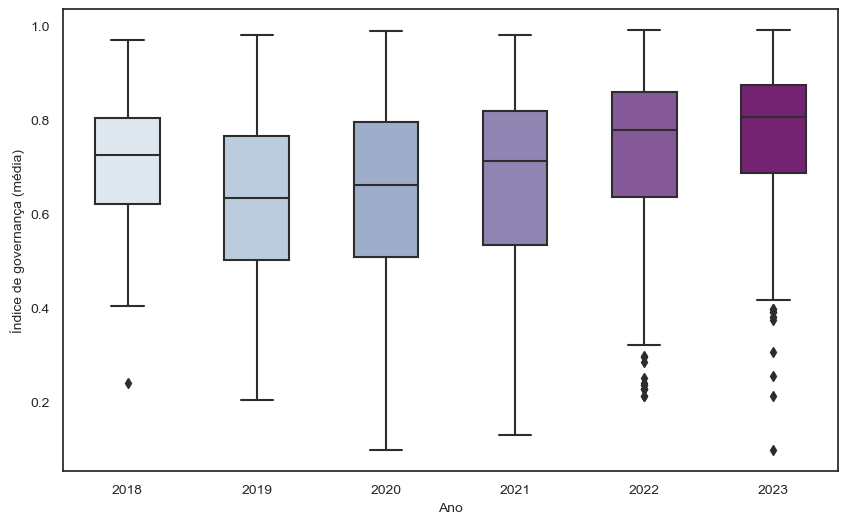

In [34]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.5, style='white')

sns.boxplot(x="Year", y="Ind. de gov.", palette='BuPu', data = df_graphs, width=0.5)


plt.xlabel("Ano", fontsize=10)
plt.ylabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_3.pdf", format="pdf")
plt.show()

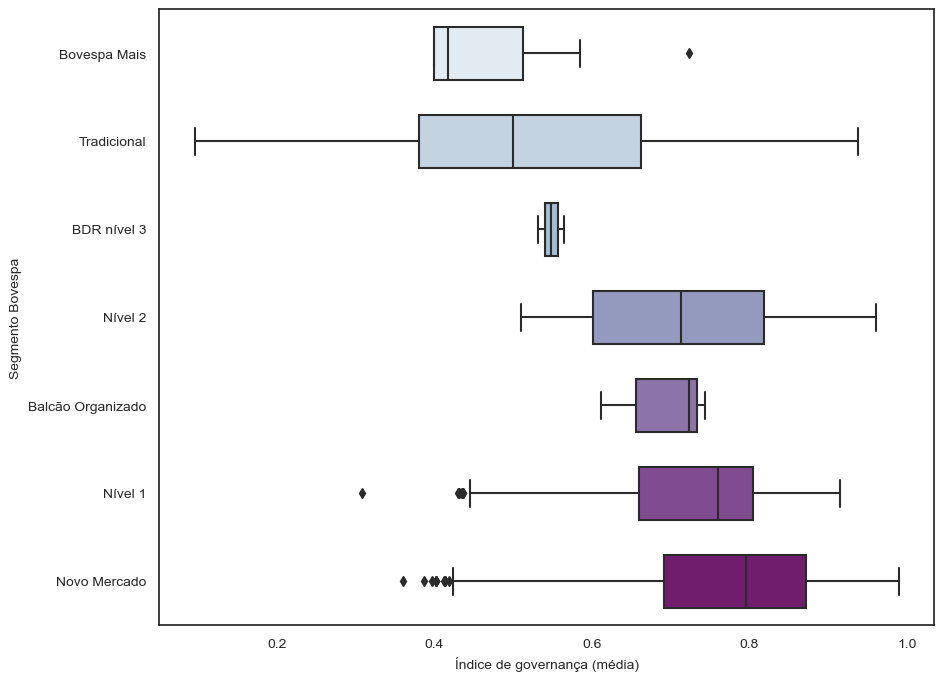

In [35]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Seg. Bovespa', 'Ind. de gov.']].groupby(['Seg. Bovespa']).median().sort_values(by='Ind. de gov.')

sns.boxplot(x="Ind. de gov.", y="Seg. Bovespa", palette='BuPu', data = df_graphs, width=0.6, order=grouped.index)


plt.xlabel("Índice de governança (média)", fontsize=10)
plt.ylabel("Segmento Bovespa", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_4_1.pdf", format="pdf")
plt.show()

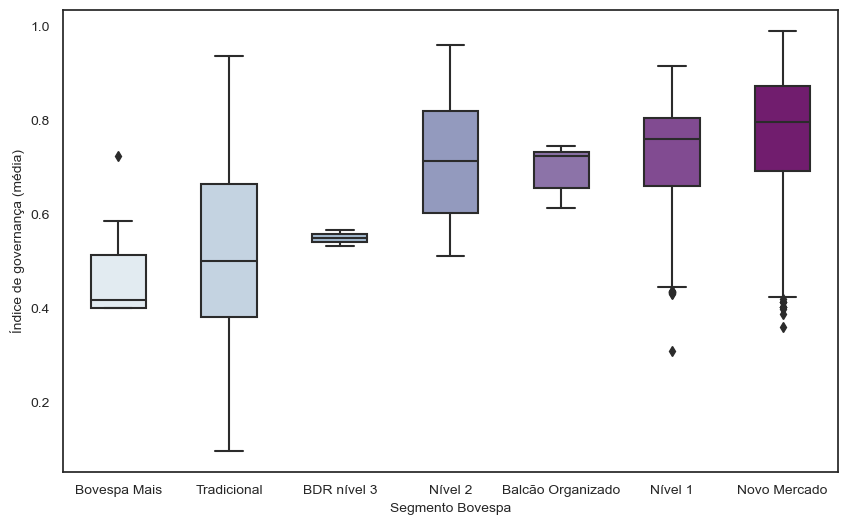

In [36]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Seg. Bovespa', 'Ind. de gov.']].groupby(['Seg. Bovespa']).median().sort_values(by='Ind. de gov.')

sns.boxplot(x="Seg. Bovespa", y="Ind. de gov.", palette='BuPu', data = df_graphs, width=0.5, order=grouped.index)


plt.xlabel("Segmento Bovespa", fontsize=10)
plt.ylabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_4_2.pdf", format="pdf")
plt.show()

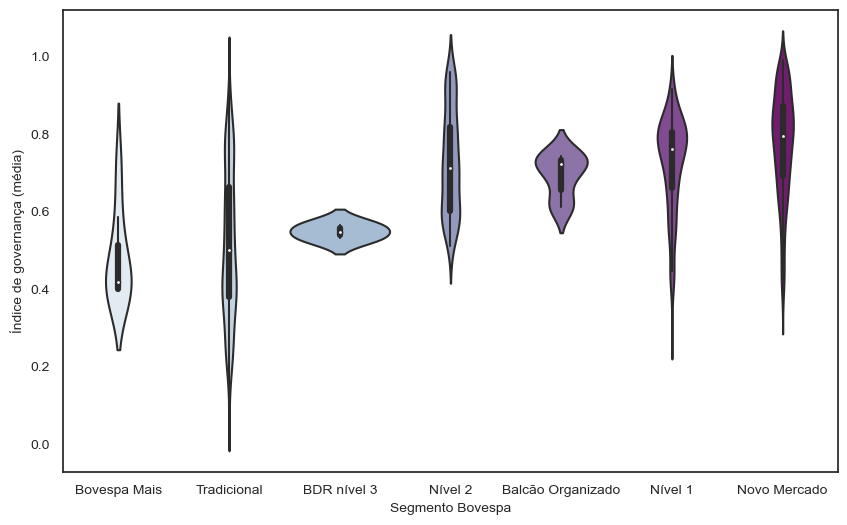

In [37]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Seg. Bovespa', 'Ind. de gov.']].groupby(['Seg. Bovespa']).median().sort_values(by='Ind. de gov.')

sns.violinplot(x="Seg. Bovespa", y="Ind. de gov.", palette='BuPu', data = df_graphs, width=0.9, order=grouped.index)


plt.xlabel("Segmento Bovespa", fontsize=10)
plt.ylabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_4_3.pdf", format="pdf")
plt.show()

C:\Users\livia\AppData\Local\Temp\ipykernel_5492\1537606355.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Seg. Bovespa", y="Ind. de gov.", palette='BuPu', data = df_graphs, order=grouped.index)


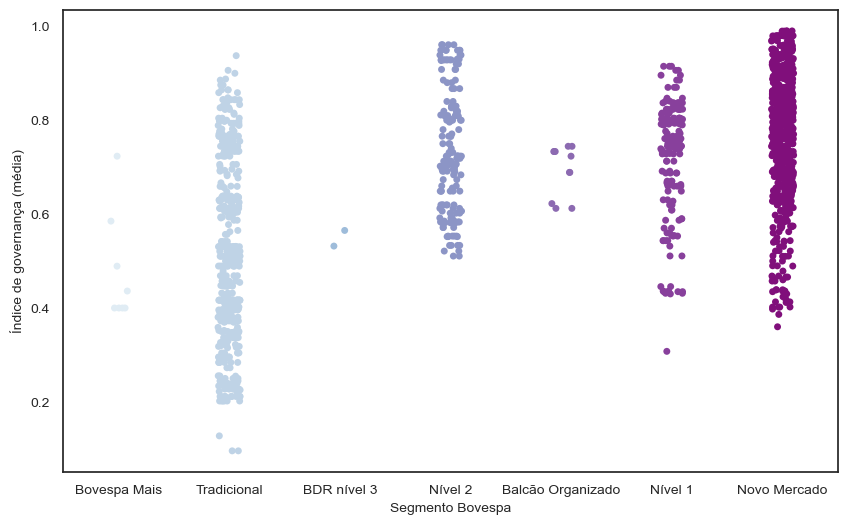

In [38]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Seg. Bovespa', 'Ind. de gov.']].groupby(['Seg. Bovespa']).median().sort_values(by='Ind. de gov.')

sns.stripplot(x="Seg. Bovespa", y="Ind. de gov.", palette='BuPu', data = df_graphs, order=grouped.index)


plt.xlabel("Segmento Bovespa", fontsize=10)
plt.ylabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_4_4.pdf", format="pdf")
plt.show()

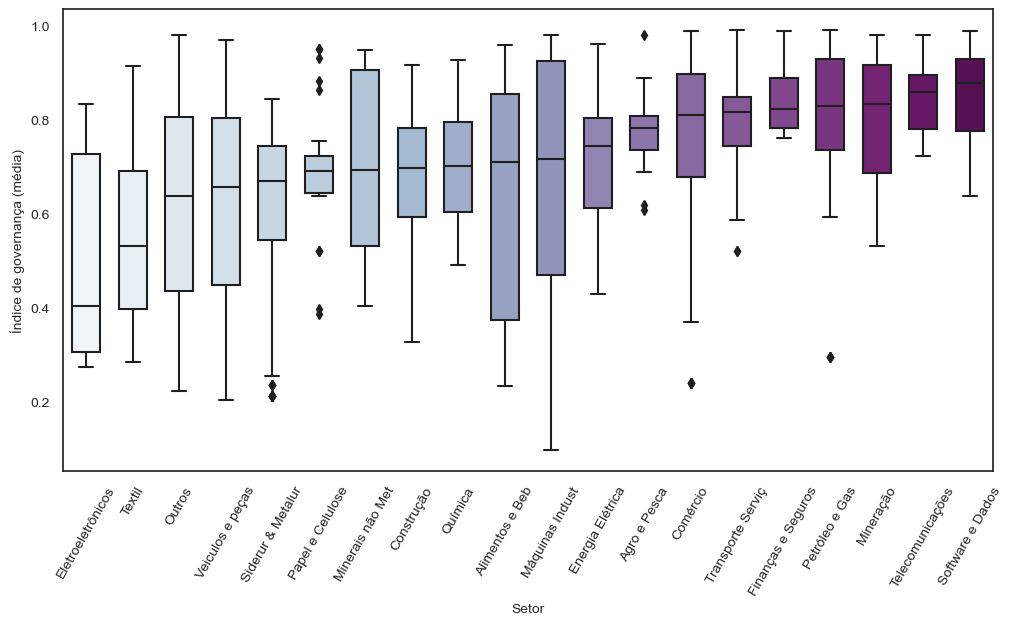

In [39]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Setor', 'Ind. de gov.']].groupby(['Setor']).median().sort_values(by='Ind. de gov.')

sns.boxplot(x="Setor", y="Ind. de gov.", palette='BuPu', data = df_graphs, width=0.6, order=grouped.index)


plt.xlabel("Setor", fontsize=10)
plt.ylabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10, rotation = 60) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_5_1.pdf", format="pdf", bbox_inches="tight")
plt.show()

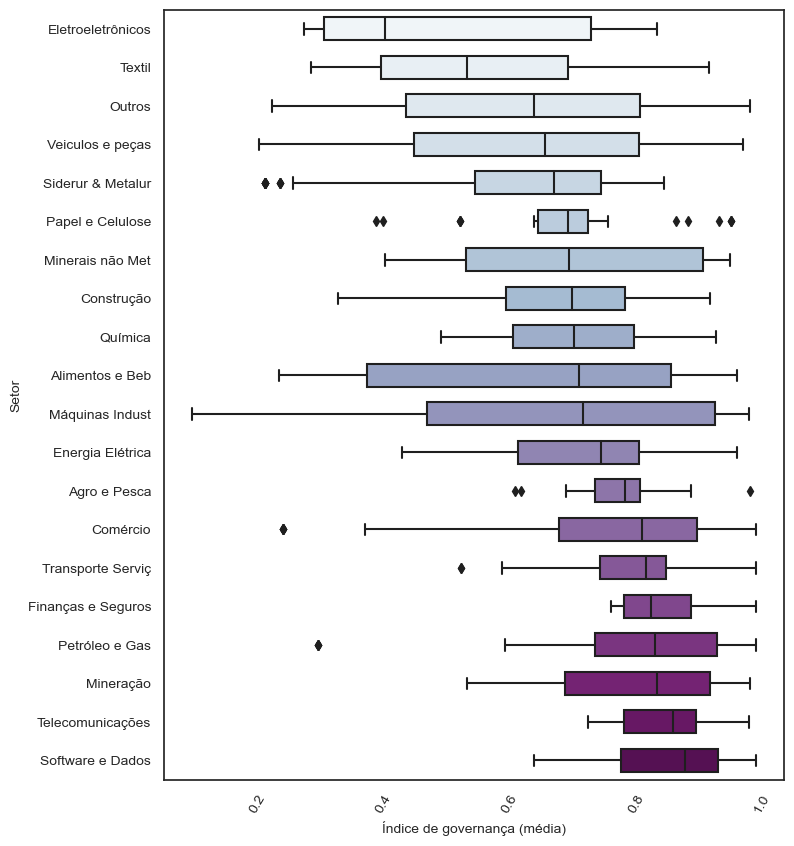

In [40]:
# Plot governance index evolution by year

df_graphs['Year'] = df_graphs['date'].dt.year 

# Creating distribution plot

sns.set(rc={'figure.figsize':(8,10)}, font_scale=1.5, style='white')

grouped = df_graphs.loc[:,['Setor', 'Ind. de gov.']].groupby(['Setor']).median().sort_values(by='Ind. de gov.')

sns.boxplot(y="Setor", x="Ind. de gov.", palette='BuPu', data = df_graphs, width=0.6, order=grouped.index)


plt.ylabel("Setor", fontsize=10)
plt.xlabel("Índice de governança (média)", fontsize=10)
plt.yticks(fontsize= 10) 
plt.xticks(fontsize= 10, rotation = 60) 

# Save figure as a pdf
plt.savefig("C:\\Users\\livia\\Desktop\\Control\\Projects\\Py1_proj_cvm\\results\\fig_5_2.pdf", format="pdf", bbox_inches="tight")
plt.show()